In [1]:
import pandas as pd
import numpy as np
from numpy import abs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

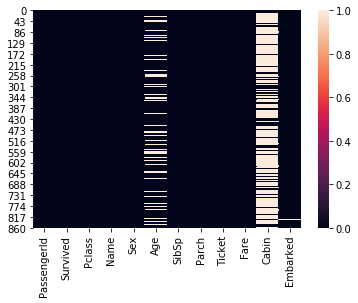

In [5]:
import seaborn as sns
sns.heatmap(data.isnull())

In [6]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [8]:
data['Age'].fillna(data['Age'].mean(),inplace=True)


In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C


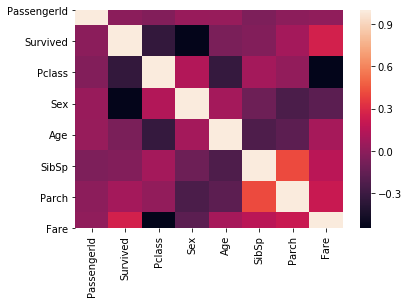

In [11]:
sns.heatmap(data.corr())

In [12]:
data.drop(columns=['Ticket','Name','Cabin','Embarked'],inplace=True,axis=1)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.000000,1,0,7.2500
1,2,1,1,0,38.000000,1,0,71.2833
2,3,1,3,0,26.000000,0,0,7.9250
3,4,1,1,0,35.000000,1,0,53.1000
4,5,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000
887,888,1,1,0,19.000000,0,0,30.0000
888,889,0,3,0,29.699118,1,2,23.4500
889,890,1,1,1,26.000000,0,0,30.0000


In [13]:
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [14]:
from scipy.stats import zscore
dt=abs(zscore(data))
print(dt.shape)
dt_new=data.loc[(dt<3).all(axis=1)]
print(dt_new.shape)

(891, 8)
(820, 8)


In [15]:
dt_new.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Sex           -0.664152
Age            0.318314
SibSp          1.979577
Parch          2.122629
Fare           2.318761
dtype: float64

In [16]:
x=dt_new.drop(columns=['Fare'])
y=dt_new[['Fare']]
print(x)
print(y)

     PassengerId  Survived  Pclass  Sex        Age  SibSp  Parch
0              1         0       3    1  22.000000      1      0
1              2         1       1    0  38.000000      1      0
2              3         1       3    0  26.000000      0      0
3              4         1       1    0  35.000000      1      0
4              5         0       3    1  35.000000      0      0
..           ...       ...     ...  ...        ...    ...    ...
886          887         0       2    1  27.000000      0      0
887          888         1       1    0  19.000000      0      0
888          889         0       3    0  29.699118      1      2
889          890         1       1    1  26.000000      0      0
890          891         0       3    1  32.000000      0      0

[820 rows x 7 columns]
        Fare
0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
..       ...
886  13.0000
887  30.0000
888  23.4500
889  30.0000
890   7.7500

[820 rows x 1 columns]


In [17]:
print(x.shape)
print(y.shape)

(820, 7)
(820, 1)


In [21]:
from sklearn.metrics import mean_squared_error,r2_score
max_rscore=0

for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=.20)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2scr=r2_score(y_test,y_pred)
    if r2scr>max_rscore:
        max_rscore=r2scr
        final_state=r
print(lr.score(x_train,y_train))
print("maxrscr for",final_state,'is',max_rscore)

from sklearn.model_selection import cross_val_score
print(cross_val_score(lr,x,y,cv=10).mean())

0.5485472259765101
maxrscr for 90 is 0.6266037811855215
0.5321994607204991


In [23]:

max_rscore=0

for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=.20)
    dst=DecisionTreeRegressor()
    dst.fit(x_train,y_train)
    y_pred=dst.predict(x_test)
    r2scr=r2_score(y_test,y_pred)
    if r2scr>max_rscore:
        max_rscore=r2scr
        final_state=r
print(dst.score(x_train,y_train))

print("maxrscr for",final_state,'is',max_rscore)
print(cross_val_score(dst,x,y,cv=10).mean())

1.0
maxrscr for 98 is 0.6919747730945808
0.39471759630298087


In [25]:
max_rscore=0
for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=.20)
    kn=KNeighborsRegressor()
    kn.fit(x_train,y_train)
    y_pred=kn.predict(x_test)
    r2scr=r2_score(y_test,y_pred)
    if r2scr>max_rscore:
        max_rscore=r2scr
        final_state=r
print(kn.score(x_train,y_train))

print("maxrscr for",final_state,'is',max_rscore)
print(cross_val_score(kn,x,y,cv=10).mean())

0.29980054543680057
maxrscr for 62 is 0.1630372169599864
-0.208308779858491


In [27]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
adb=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(adb,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 100}

In [28]:
adb=AdaBoostRegressor(learning_rate=0.001,n_estimators=100)
print('cors_val_score mean:',cross_val_score(adb,x,y,cv=5).mean())
print('cors_val_score std:',cross_val_score(adb,x,y,cv=5).std())

cors_val_score mean: 0.601648730800207
cors_val_score std: 0.0908690546531451


In [29]:
from sklearn.externals import joblib
joblib.dump(adb,'titanic.pk1')

['titanic.pk1']